# Classifying Fashion-MNIST

Now it's your turn to build and train a neural network. You'll be using the [Fashion-MNIST dataset](https://github.com/zalandoresearch/fashion-mnist), a drop-in replacement for the MNIST dataset. MNIST is actually quite trivial with neural networks where you can easily achieve better than 97% accuracy. Fashion-MNIST is a set of 28x28 greyscale images of clothes. It's more complex than MNIST, so it's a better representation of the actual performance of your network, and a better representation of datasets you'll use in the real world.

<img src='assets/fashion-mnist-sprite.png' width=500px>

In this notebook, you'll build your own neural network. For the most part, you could just copy and paste the code from Part 3, but you wouldn't be learning. It's important for you to write the code yourself and get it to work. Feel free to consult the previous notebooks though as you work through this.

First off, let's load the dataset through torchvision.

In [27]:
import torch
from torchvision import datasets, transforms
import helper

# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
# Download and load the training data
trainset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

# Download and load the test data
testset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)

Here we can see one of the images.

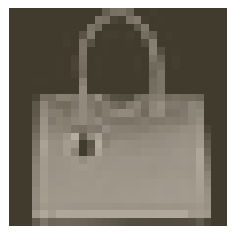

In [11]:
image, label = next(iter(trainloader))
helper.imshow(image[0,:]);

## Building the network

Here you should define your network. As with MNIST, each image is 28x28 which is a total of 784 pixels, and there are 10 classes. You should include at least one hidden layer. We suggest you use ReLU activations for the layers and to return the logits or log-softmax from the forward pass. It's up to you how many layers you add and the size of those layers.

#### Solution 1 for implementing the model

In [70]:
# TODO: Define your network architecture here
from torch import nn, optim

model = nn.Sequential(nn.Linear(784, 400),
                      nn.ReLU(),
                      nn.Linear(400, 10),
                      nn.LogSoftmax(dim=1))

#### Solution 2 for implementing the model

In [74]:
import torch.nn.functional as F
from torch import nn, optim

class Network(nn.Module):
    def __init__(self):
        super().__init__()
        self.f1 = nn.Linear(784, 400)
        self.f2 = nn.Linear(400, 10)

    def forward(self, x):
        # Adjust shape automatically
        x = x.view(x.shape[0], -1)
        
        # Do the forward pass
        x = F.relu(self.f1(x))
        x = F.log_softmax(self.f2(x, dim=1))
        
        return x

# Train the network

Now you should create your network and train it. First you'll want to define [the criterion](http://pytorch.org/docs/master/nn.html#loss-functions) ( something like `nn.CrossEntropyLoss`) and [the optimizer](http://pytorch.org/docs/master/optim.html) (typically `optim.SGD` or `optim.Adam`).

Then write the training code. Remember the training pass is a fairly straightforward process:

* Make a forward pass through the network to get the logits 
* Use the logits to calculate the loss
* Perform a backward pass through the network with `loss.backward()` to calculate the gradients
* Take a step with the optimizer to update the weights

By adjusting the hyperparameters (hidden units, learning rate, etc), you should be able to get the training loss below 0.4.

#### How to choose a network architecture
[Two helpful answers on Datascience.StackExchange](https://datascience.stackexchange.com/questions/22199/what-are-the-default-values-of-nodes-and-internal-layers-in-neural-network-model/22289?newreg=37970945851d41f4bb4b3880455a9b5f)

[Helpful insights on NN design on Stats.StackExchange](https://stats.stackexchange.com/q/181/303178)

> Apparently there is almost never a reason to use a NN with more than one hidden layer.

> A NN with two hidden layers can represent functions with any kind of shape.

> If you choose one hidden layer and the number of Neurons as the mean of the input neurons and output neurons your model should be decent.

> In general, after the basic architecture decision you should focus on using regularization and pruning to improve your model.

**[Choose number of neurons to prevent overfitting](https://stats.stackexchange.com/a/136542/303178)**

There's one additional rule of thumb that helps for supervised learning problems. You can usually prevent over-fitting if you keep your number of neurons below:
$$N_h = \frac{N_s} {(\alpha * (N_i + N_o))}$$

$N_i$ = number of input neurons.   
$N_o$ = number of output neurons.  
$N_s$ = number of samples in training data set.  
$\alpha$ = an arbitrary scaling factor usually 2-10.  
                   
[Others recommend](http://www.solver.com/training-artificial-neural-network-intro) setting $alpha$ to a value between 5 and 10, but I find a value of 2 will often work without overfitting. You can think of alpha as the effective branching factor or number of nonzero weights for each neuron. Dropout layers will bring the "effective" branching factor way down from the actual mean branching factor for your network.

As explained by this [excellent NN Design text](http://hagan.okstate.edu/NNDesign.pdf#page=469), you want to limit the number of free parameters in your model (its [degree](https://stats.stackexchange.com/q/57027/15974) or number of nonzero weights) to a small portion of the degrees of freedom in your data. The degrees of freedom in your data is the number samples * degrees of freedom (dimensions) in each sample or $N_s * (N_i + N_o)$ (assuming they're all independent). So $\alpha$ is a way to indicate how general you want your model to be, or how much you want to prevent overfitting.

For an automated procedure you'd start with an alpha of 2 (twice as many degrees of freedom in your training data as your model) and work your way up to 10 if the error (loss) for your training dataset is significantly smaller than for your test dataset.


In [71]:
# TODO: Create the network, define the criterion and optimizer
from torch import optim

criterion = nn.NLLLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)

In [72]:
# TODO: Train the network here
epochs = 50

for i in range(1, epochs+1):
    running_loss = 0
    for images, labels in trainloader:
        images = images.view(images.shape[0],-1)

        optimizer.zero_grad()

        output = model.forward(images)
        loss = criterion(output, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
    else:
        print(f'Epoch {i}, Loss: {running_loss}')


Epoch 1, Loss: 486.2116942256689
Epoch 2, Loss: 359.74932196736336
Epoch 3, Loss: 325.61565738916397
Epoch 4, Loss: 300.9364540427923
Epoch 5, Loss: 281.93112441152334
Epoch 6, Loss: 266.90624471753836
Epoch 7, Loss: 255.85140361636877
Epoch 8, Loss: 240.47307977825403
Epoch 9, Loss: 232.97322003543377
Epoch 10, Loss: 224.2706679403782
Epoch 11, Loss: 217.42446222901344
Epoch 12, Loss: 208.29887482523918
Epoch 13, Loss: 200.15905310213566
Epoch 14, Loss: 193.98286356031895
Epoch 15, Loss: 187.9294614493847
Epoch 16, Loss: 180.4437223561108
Epoch 17, Loss: 172.86457792669535
Epoch 18, Loss: 165.59678498655558
Epoch 19, Loss: 162.49872126430273
Epoch 20, Loss: 156.10482139140368
Epoch 21, Loss: 153.69497208856046
Epoch 22, Loss: 148.4639249369502
Epoch 23, Loss: 143.05672120302916
Epoch 24, Loss: 137.17382421158254
Epoch 25, Loss: 132.7833027523011
Epoch 26, Loss: 131.18710041046143
Epoch 27, Loss: 124.44796534627676
Epoch 28, Loss: 120.5242502130568
Epoch 29, Loss: 114.00963395275176
Ep

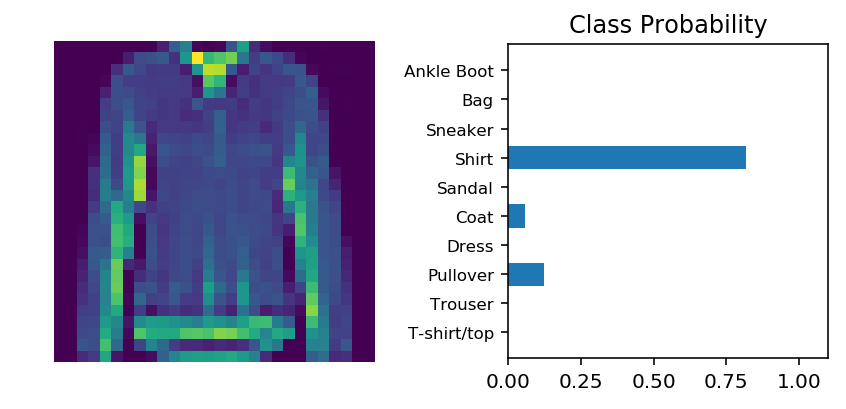

In [68]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import helper

# Test out your network!

dataiter = iter(testloader)
images, labels = dataiter.next()
img = images[0]
# Convert 2D image to 1D vector
img = img.resize_(1, 784)

# TODO: Calculate the class probabilities (softmax) for img
with torch.no_grad():
    ps = torch.exp(model(img))  # model(img) is a shortcut for model.forward(img)

# Plot the image and probabilities
helper.view_classify(img.resize_(1, 28, 28), ps, version='Fashion')